In [1]:
import os
import numpy as np
from Custom import Mouse

import settings as s
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
batch = s.Batch()

In [5]:
mice_id = batch.id_first_dlp
mice = [Mouse(path='/home/anverdie/share/gaia/Data/Optogenetic/DLP/{}'.format(i), tag=['SPAF'], dlp=True, rmgaps='Antonin', verbose=True) for i in mice_id]



Processing files for mice 753564...
SPAF_24012022_753562_2.DAT
SPAF_25012022_753562_1.DAT
SPAF_24012022_753562_1.DAT
Processing files for mice 753572...
SPAF_25012022_753572_1.DAT
SPAF_24012022_753572_1.DAT
SPAF_21012022_753572_1.DAT
SPAF_24012022_753572_2.DAT
Processing files for mice 753573...
SPAF_20012022_753573_1.DAT
SPAF_25012022_753573_1.DAT
SPAF_20012022_753573_2.DAT


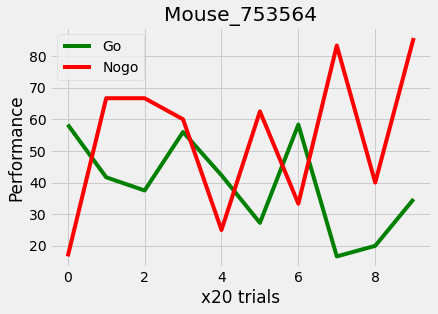

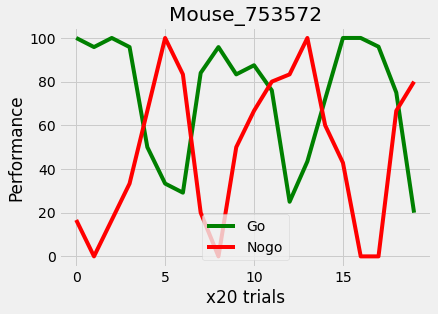

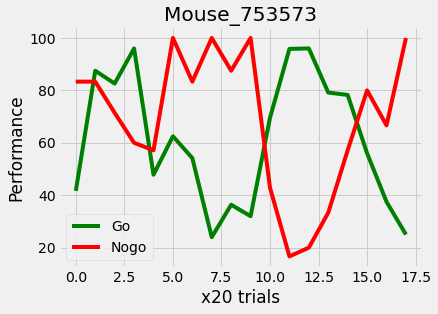

In [7]:
for mouse in mice:
    if mouse.elphy:
        
        ta_type = [f.ta_type for f in mouse.elphy]
        ttype = [f.tr_type for f in mouse.elphy]
        tcorr = [f.tr_corr for f in mouse.elphy]
        ttype = [t[:len(c)] for t, c in zip(ttype, tcorr)]
        ttype = np.concatenate(ttype)
        tcorr = np.concatenate(tcorr)

        task = ttype*tcorr

        sf = 30
        blocks = [ttype[i*sf:(i+1)*sf] for i in range(int(len(ttype)/sf))]
        corr_blocks = [tcorr[i*sf:(i+1)*sf] for i in range(int(len(tcorr)/sf))]

        go = []
        nogo = []
        for i, b in enumerate(blocks):
            idx_gos = np.where(b == 2)[0]
            idx_nogos = np.where(b == 1)[0]
            if len(idx_gos) > 0:
                go.append(np.sum(corr_blocks[i][idx_gos])*100/len(idx_gos))
                nogo.append(np.sum(corr_blocks[i][idx_nogos])*100/len(idx_nogos))
        plt.plot(go, c='green', label='Go')
        plt.plot(nogo, c='red', label='Nogo')
        plt.legend()
        plt.tight_layout()
        plt.xlabel('x20 trials')
        plt.ylabel('Performance')
        plt.title('Mouse_{}'.format(mouse.ID))
        plt.savefig('{}.png'.format(mouse.ID), dpi=250)
        plt.show()

        
    
    